## Goal: Differentiate Infections, sterile inflammation, and healthy tissue using MRI
The following methods were used in this study:
1. T2 relaxation of the tissue without a contrast agent
2. Dynamic contrast-enhanced (DCE) MRI using Maltose as a T2-ex contrast agent
3. Chemical Exchange Saturation Transfer (CEST) MRI without a contrast agent

**Author**: Julio Cárdenas-Rodríguez, Ph.D.  
**email**:  cardenaj@email.arizona.edu

### Description of the data
A total of **XX** mice were used in this study. Each mouse was infected as follows:
- Right thigh: with approximatley 100 uL of a solution of XX CFU/mL of *E. Coli*.
- Left thigh: same dose but using a solution that contain heat-inactivated *E. Coli*.

Both thighs can be seen in each image, and a total of of five imaging slices were collected around the center of infection. The average signal for the following region of interest (ROIS) were collected for all slices:

1. Infected Site
2. Apparently Healthy Tissue on the right thigh
3. Sterile inflammation on the left thigh
4. Apparently Healthy Tissue on the left thigh

In [4]:
# Import Python Modules
import numpy as np
#import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
import pandas as pd
# Import LOCAL functions written by me
from mylocal_functions import * 

## T2 relaxation

In [5]:
# Make list of all T2.txt files
T2_list = get_ipython().getoutput('ls ../Study_03_CBA/*T2.txt')

# Allocate variables needed for analysis
T2DF=pd.DataFrame()
TR=np.linspace(.012,.012*12,12)

# Fit T2 for all ROIs, slices and mice. construct dataframe
for names in T2_list:
    #Convert txt file to array
    YDataMatrix=txt_2_array(names)
    #Estimate T2
    T2time=fitT2(TR,YDataMatrix)
    #convert to data frame
    df_T2=pd.DataFrame(T2time.T,columns=["Infected","Healthy_Right","Sterile_Inflammation","Healthy_Left"])
    #df_T2=pd.DataFrame(T2time.T,columns=["ROI-1","ROI-2","ROI-3","ROI-4"])
    df_info=name_2_df(names)
    df_final=pd.concat([df_T2,df_info], axis=1)
    T2DF=T2DF.append(df_final,ignore_index=True)

(0.025, 0.15)

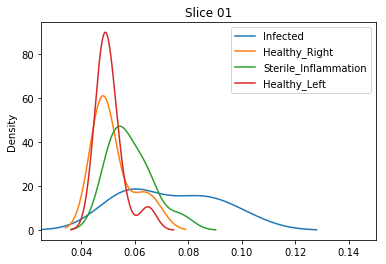

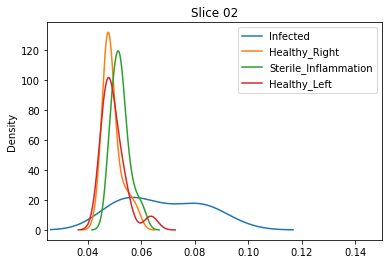

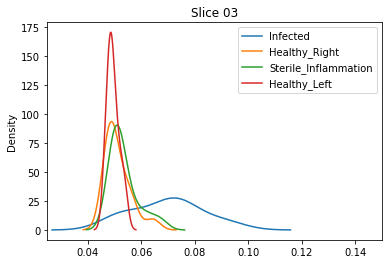

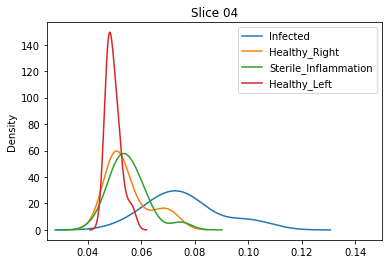

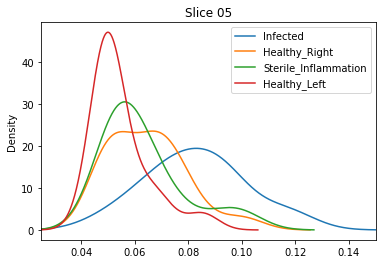

In [6]:
# Plot distribution of estimated T2 for each slice
T2DF[T2DF.Slice==1].iloc[:,:4].plot.density(); title("Slice 01"); xlim((0.025,.15))
T2DF[T2DF.Slice==2].iloc[:,:4].plot.density(); title("Slice 02"); xlim((0.025,.15))
T2DF[T2DF.Slice==3].iloc[:,:4].plot.density(); title("Slice 03"); xlim((0.025,.15))
T2DF[T2DF.Slice==4].iloc[:,:4].plot.density(); title("Slice 04"); xlim((0.025,.15))
T2DF[T2DF.Slice==5].iloc[:,:4].plot.density(); title("Slice 05"); xlim((0.025,.15))

In [11]:
# Make list of all T2.txt files
CEST_list = get_ipython().getoutput('ls ../Study_03_CBA/*CEST.txt')
CEST_list[0]

'../Study_03_CBA/Goldenberg_M1_S3_2017_1_2_CEST.txt'

In [12]:
# Allocate variables needed for analysis
YDataMatrix=txt_2_array(CEST_list)

TypeError: invalid file: ['../Study_03_CBA/Goldenberg_M1_S3_2017_1_2_CEST.txt', '../Study_03_CBA/Goldenberg_M1_S3_2017_1_5_CEST.txt', '../Study_03_CBA/Goldenberg_M1_S3_2017_1_6_CEST.txt', '../Study_03_CBA/Goldenberg_M2_S3_2017_1_2_CEST.txt', '../Study_03_CBA/Goldenberg_M2_S3_2017_1_4_CEST.txt', '../Study_03_CBA/Goldenberg_M2_S3_2017_1_6_CEST.txt', '../Study_03_CBA/Goldenberg_M2_S4_2017_1_5_CEST.txt', '../Study_03_CBA/Goldenberg_M3_S3_2017_1_2_CEST.txt', '../Study_03_CBA/Goldenberg_M3_S3_2017_1_4_CEST.txt', '../Study_03_CBA/Goldenberg_M3_S3_2017_1_5_CEST.txt', '../Study_03_CBA/Goldenberg_M3_S4_2017_1_6_CEST.txt', '../Study_03_CBA/Goldenberg_M4_S3_2017_1_4_CEST.txt', '../Study_03_CBA/Goldenberg_M4_S3_2017_1_5_CEST.txt', '../Study_03_CBA/Goldenberg_M4_S3_2017_1_6_CEST.txt', '../Study_03_CBA/Goldenberg_M5_S4_2017_1_5_CEST.txt', '../Study_03_CBA/Goldenberg_M5_S4_2017_1_6_CEST.txt']

In [13]:
# Fit T2 for all ROIs, slices and mice. construct dataframe
for names in T2_list:
    #Convert txt file to array
    YDataMatrix=txt_2_array(names)
    #Estimate T2
    T2time=fitT2(TR,YDataMatrix)
    #convert to data frame
    df_T2=pd.DataFrame(T2time.T,columns=["Infected","Healthy_Right","Sterile_Inflammation","Healthy_Left"])
    #df_T2=pd.DataFrame(T2time.T,columns=["ROI-1","ROI-2","ROI-3","ROI-4"])
    df_info=name_2_df(names)
    df_final=pd.concat([df_T2,df_info], axis=1)
    T2DF=T2DF.append(df_final,ignore_index=True)

## CEST MRI